In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
%matplotlib inline

`plt.show` is blocking command. Prevents the code from execution until the window is closed. It's mandatory to use it with `*.py` files. In IPython it's enough to use magic command `%matplotlib inline``.

In [4]:
fb = pd.read_csv('../datasets/fb.csv', index_col='date', parse_dates=True)

In [5]:
fb.head(2)

,high,low,open,close,volume
date,,,,,
2018-01-02,181.58,177.55,177.68,181.42,18151900
2018-01-03,184.78,181.33,181.88,184.67,16886600


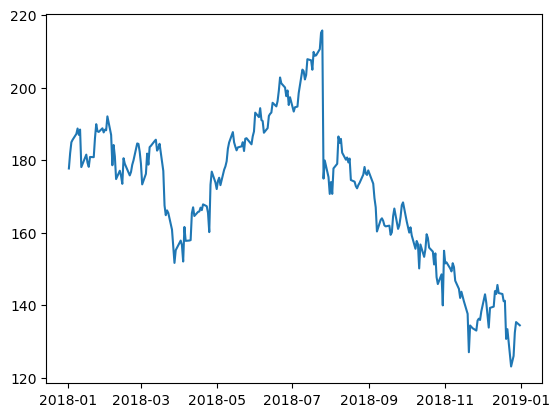

In [6]:
plt.plot(fb.index, fb.open)
plt.show()

We can build a scatterplot with `plt.plot` as well. We need to pass the __string__ with parameters as the 3rd argument. The format is `[color][marker][linestyle]`. `ro` -> red dots

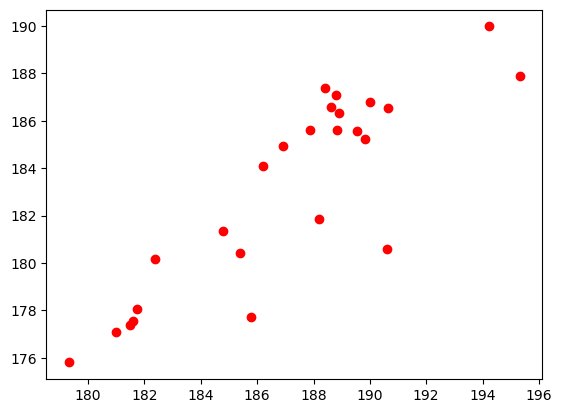

In [8]:
plt.plot('high', 'low', 'ro', data=fb.head(25))
plt.show()


| Format string component | Result |
| :---: | :---:|
| `b` | blue |
| `k` | black|
| `r` | red|
| `g` | green|
| `m` | magenta |
| `c` | cyan |
| `- `| solid line |
| `--` | dashed line |
| `.` | points |
| `:` | dotted line |
| `-.` | dot-dashed line |




* 
* 
* 

| Marker | Linestyle | Color | Format String | Result |
| :---: | :---: | :---: | :---: | --- |
| | `-` | `b` | `-b` | blue solid line|
| `.` |  | `k` | `.k` | black points|
|  | `--` | `r` | `--r` | red dashed line|
| `o` | `-` | `g` | `o-g` | green solid line with circles|
| | `:` | `m` | `:m` | magenta dotted line|
|`x` | `-.` | `c` | `x-.c` | cyan dot-dashed line with x's|

We can also use `color`, `linestyle` and `marker` arguments. From [matplotlib cycler](https://matplotlib.org/3.2.2/gallery/color/color_cycler.html)
 

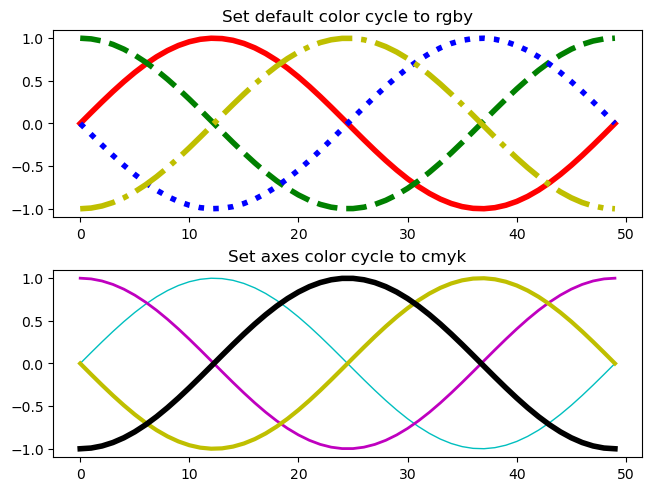

In [9]:
from cycler import cycler
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=4)
plt.rc('axes', prop_cycle=(cycler(color=['r', 'g', 'b', 'y']) +
                           cycler(linestyle=['-', '--', ':', '-.'])))
fig, (ax0, ax1) = plt.subplots(nrows=2, constrained_layout=True)
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

# 2. Define prop cycle for single set of axes
#    For the most general use-case, you can provide a cycler to
#    `.set_prop_cycle`.
#    Here, we use the convenient shortcut that we can alternatively pass
#    one or more properties as keyword arguments. This creates and sets
#    a cycler iterating simultaneously over all properties.
ax1.set_prop_cycle(color=['c', 'm', 'y', 'k'], lw=[1, 2, 3, 4])
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

plt.show()

### Histograms

In [11]:
eq = pd.read_csv('../datasets/earthquakes.csv')

In [12]:
eq.head(2)

,alert,cdi,code,detail,dmin,felt,gap,ids,mag,magType,...,sources,status,time,title,tsunami,type,types,tz,updated,url
0,NaN,NaN,37389218,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.01,NaN,85.00,",ci37389218,",1.35,ml,...,",ci,",automatic,1539475168010,"M 1.4 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475395144,https://earthquake.usgs.gov/earthquakes/eventp...
1,NaN,NaN,37389202,https://earthquake.usgs.gov/fdsnws/event/1/que...,0.02,NaN,79.00,",ci37389202,",1.29,ml,...,",ci,",automatic,1539475129610,"M 1.3 - 9km NE of Aguanga, CA",0,earthquake,",geoserve,nearby-cities,origin,phase-data,",-480.00,1539475253925,https://earthquake.usgs.gov/earthquakes/eventp...


In [13]:
eq.magType.unique()

array(['ml', 'md', 'mb', 'mww', 'mb_lg', 'mwr', 'mw', 'mh', 'ms_20',
       'mwb', nan], dtype=object)

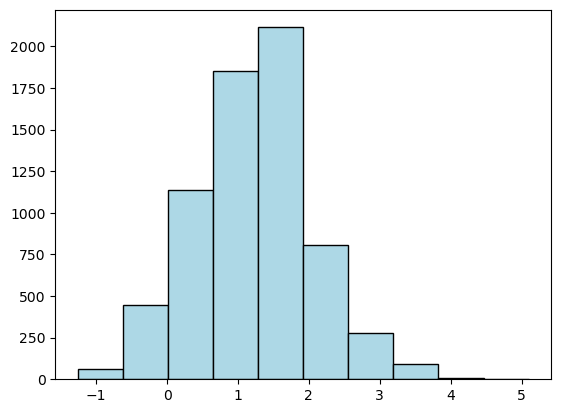

In [21]:
plt.hist(eq[eq.magType == 'ml'].mag, color = 'lightblue', edgecolor='black')
plt.show()

In [16]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in each bin, then draws the distribution either as a
`.BarContainer` or `.Polygon`. The *bins*, *range*, *density*, and
*weights* parameters are forwarded to `numpy.histogram`.

If the data has already been binned and counted, use `~.bar` or
`~.stairs` to plot the distribution::

    counts, bins = np.histogram(x)
    plt.stairs(counts, bins)

Alternatively, plot pre-computed bins and counts using ``hist()`` by
treating each bin as a single point with a weight equal to its count::

    plt.hist(bins[:-1], bins, weights=counts)

The data input